# Project: Data Wrangling and Analysis on WeRateDogs' Twitter page data.


## Table of Content

<ul>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assessing">Data Assessment</a></li>
    <li><a href="#Cleaning and Trimming">Data Cleaning and Trimming</a></li>
    <li><a href="#Storing">Data Storing</a></li>
    <li><a href="#Analyzing and Visualizing">Analysis and Visualization</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
</ul>

## <u> Astract 

This project aims to explore the data wrangling and analysis process, with data obtained from WeRatedogs' Twitter page. This data will be downloaded from a csv file, downloaded programmatically with the requests library, and then scrapped from the twitter API.

This data will then be assessed, cleaned, trimmed, and analyzed.

#### Importing the necessarily libraries 

In [1]:
import pandas as pd
import requests
import os
import json
import re
import tweepy
from tweepy import OAuthHandler 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from timeit import default_timer as timer

%matplotlib inline

## <u>Gathering

#### Importing the first dataset

In [2]:
df_archive = pd.read_csv(r'C:\Users\PC\Documents\GitHub\ALX-T\Project 02 - Data Wrangling\Datasets\twitter-archive-enhanced.csv')

#### Downloading the second dataset programmatically using the requests library

In [3]:
folder_name = 'Datasets'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
df_images = pd.read_csv(r'C:\Users\PC\Documents\GitHub\ALX-T\Project 02 - Data Wrangling\Datasets\image-predictions.tsv', sep='\t')

#### Reading the third dataset into a dataframe from the tweet-json.txt file 

In [10]:
# scrapping this second dataset from the twitter api would require first importing tweepy, and other necessary libraries
# this has however been done in the abstract section of this notebook.
# The next thing to do would be to set the consumer key and a host of other sensitive keys to hidden
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

#creating an OAuthHandler instance to which we'll pass our consumer token and secret
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Querying Twitter's API for the needed JSON formatted data, and dumping this data to .txt file using a for loop
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

However, I had issues getting access to the twitter API, so i had to get the additional twitter data via Udacity's servers.

In [6]:
# created a for loop to read the json.txt file into pandas dataframe line by line
twitter = []
with open('tweet-json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        twitter.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})

df_twitter = pd.DataFrame(twitter, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

<a id='Assessing'></a>

## <u>Assessing


This may be done visually or programmatically. First, we will attempt doing it visually by just printing the dataset and trying to identify any errors.

### Visual Assessment

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
df_twitter

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


### Programmatic Assessment

This is done with the use of python code, and some python libraries.

In order to save time, and avoid code repetition, we will create a function which will return basic information on our datasets.

In [10]:
def info(df):
    print(df.info())
    print(df.shape)

#### df_archive

In [11]:
info(df_archive)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1864,675362609739206656,NaN,NaN,2015-12-11 17:12:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She loves that shoe. Still no s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675362609...,12,10,Daisy,None,None,None,None
848,766069199026450432,NaN,NaN,2016-08-18 00:28:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juno. She can see your future. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766069199...,12,10,Juno,None,None,None,None
1692,681302363064414209,NaN,NaN,2015-12-28 02:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,None,None,None,None
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None


Checking appropriate columns for duplicate entries

In [14]:
df_archive[df_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
df_archive[df_archive['text'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
df_archive[df_archive['expanded_urls'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


Checking appropriate columns for unique values

In [17]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
df_archive.loc[df_archive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


#### df_images

In [19]:
info(df_images)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
(2075, 12)


In [20]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False
563,678021115718029313,https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg,1,miniature_pinscher,0.822048,True,Doberman,0.096085,True,Rottweiler,0.032709,True
204,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,Pembroke,0.858494,True,hamster,0.026319,False,Shetland_sheepdog,0.022405,True
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
336,672222792075620352,https://pbs.twimg.com/media/CVQ3EDdWIAINyhM.jpg,1,beagle,0.958178,True,basset,0.009117,True,Italian_greyhound,0.007731,True


Checking appropriate columns for duplicate values.

In [22]:
df_images[df_images['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


#### df_twitter

In [23]:
info(df_twitter)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB
None
(2354, 4)


In [24]:
df_twitter.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Issues

#### df_archive
Quality Issues
- Dataset contains retweeted rows
- Missing data: expanded_urls
- Lowercase dog name
- Erroneous datatypes: in_reply_to_status_id, in_reply_to_user_id, timestamp, 
- Duplicate Entries: expanded_urls
- Erroneous entries:  names column contains values such as 'none', 'quite' etc

Tidiness
- Doggo, Floofer, Pupper and Puppo should be merged into 1 column

#### df_images
Quality Issues
- Lowercase dog name
- Duplicate Entries: jpg_url

Tidiness Issues
- The p1, p2 and p3 columns should form one column(dog breed), which would consist of the prediction with the highest p_conf


#### df_twitter
Quality Issues
- Drop column: create_date

Tidiness issues
- Merge this table with the df_archive and df_images table using the tweet_id as a primary key 

<a id='Cleaning and Trimming'></a>

## <u>Cleaning and Trimming

Before we commence with the cleaning, it is advised we make a copy of the datasets

In [25]:
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_twitter_clean = df_twitter.copy()

We will applying the programmatic cleaning process to this dataset, which comprises of three major steps

- Defining
- Coding 
- Testing

## 1. Dataset contains retweeted row

### Define

As earlier stated, some rows of data do not belong in this dataset, as this dataset is focused on original tweets only, and these rows contain retweets or other unwanted data. In this section of the cleaning, we will deal with this issue, by dropping rows where the following columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are not null.

### Code

In [26]:
# first we need to retrieve the rows where these columns are not empty
df_archive_clean[df_archive_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [27]:
# Test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
# dropping rows where retweet_status_id is not null
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_id.notnull()].index, inplace=True)

In [29]:
# confirmation
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [30]:
# Now we check for the rows where retweeted_status_user_id is not null
df_archive_clean[df_archive_clean['retweeted_status_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
# Now we check for the rows where retweeted_status_timestamp is not null
df_archive_clean[df_archive_clean['retweeted_status_timestamp'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
# Now we check for the rows where in_reply_to-status_id is not null
df_archive_clean[df_archive_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [33]:
# Test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [34]:
# dropping rows where in_reply_to_status_id is not null
df_archive_clean.drop(df_archive_clean[df_archive_clean.in_reply_to_status_id.notnull()].index, inplace=True)

In [35]:
# confirmation
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [36]:
# Now we check for the rows where in_reply_to_user_id is not null
df_archive_clean[df_archive_clean['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
# Since these columns are now empty, it is best we drop them
df_archive_clean = df_archive_clean.drop(labels=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

### Test

In [38]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## 2. Lower case dog names

### Define

Converting the first letter of all the dog names to uppercase

### Code

In [39]:
df_archive_clean["name"] = df_archive_clean["name"].map(lambda x: x[0].upper() + x[1:-1] + x[-1])

### Test

In [40]:
df_archive_clean["name"].head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

## 3. Erroneous Datatypes: in_reply_to_status_id, in_reply_to_user_id, timestamp.

### Define

The in_reply_to_status_id and in_reply_to_user_id columns have already been dropped, so our focus here will be converting the timestamp column from object(string) to datetime.

### Code

In [41]:
df_archive_clean['timestamp']= pd.to_datetime(df_archive_clean['timestamp'])

### Test

In [42]:
df_archive_clean['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2097 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 32.8 KB


## 4. Duplicated Entries: expanded_urls

### Define

Removing duplicated entries from the expanded_urls column.

### Code

In [43]:
# Test
sum(df_archive_clean.expanded_urls.duplicated())

3

In [44]:
df_archive_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

### Test

In [45]:
# Confirmation
sum(df_archive_clean.expanded_urls.duplicated())

0

## 5. Erroneous entries: names column contains values such as 'none', 'the' etc

### Define

To fix this issue, we will need to access the text column in the df_archive dataset, as this contains some of the names of the dogs. These names will be used to replace the names in the names column, so as to get rid of the erroneous names.

We will use a for loop to loop through every entry in the text column to retrieve the needed names

In [46]:
# we will start the process by creating an empty list to house the results
names = []

#Then we will loop through unique sentence type to retrieve the names
for text in df_archive_clean['text']:
    if text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        names.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        names.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('His name is ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named')+1]):
        names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        names.append('NaN')
        

In [47]:
# Confirmation
names[0:5]

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin']

In [48]:
# Now we will append this list into the df_archive_clean[names] column
df_archive_clean['names'] = names

In [49]:
# The text column only contains some of the names, so to retrieve the rest, we will extraxt them from the name column
df_archive_clean.loc[df_archive_clean['names'] == 'NaN', 'names'] = df_archive_clean['name']

In [50]:
# Confirmation
df_archive_clean['names'].head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5        None
6         Jax
7        None
8        Zoey
9      Cassie
Name: names, dtype: object

In [51]:
# replacing invalid values like 'None', 'Aa' etc with 'NaN'
trash = ['Aa', 'None', 'Such', 'An', 'The', 'a', 'Quite']

for i in range(len(df_archive_clean['names'])):
    df_archive_clean['names'].replace(trash, np.NaN, inplace = True)

In [52]:
# dropping the name column
df_archive_clean.drop('name', axis=1, inplace=True)

### Test
 

In [53]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names
1347,704364645503647744,2016-02-29 17:56:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He's a Beneplop Cumbers...,https://twitter.com/dog_rates/status/704364645...,12,10,None,None,None,None,Bisquick
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,None,None,pupper,None,Sophie
1537,689877686181715968,2016-01-20 18:30:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,https://twitter.com/dog_rates/status/689877686...,9,10,None,None,None,None,Durg
2001,672482722825261057,2015-12-03 18:29:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is light saber pup. Ready to fight off ev...,https://twitter.com/dog_rates/status/672482722...,10,10,None,None,None,None,Light
1322,706291001778950144,2016-03-06 01:31:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,https://twitter.com/dog_rates/status/706291001...,11,10,None,None,None,None,NaN


## 6. Doggo, Floofer, Pupper and Puppo should be merged into 1 column

### Define

This is a tidiness issue, and we will fix it by first converting 'None' in all these columns to NaN. Then merging them into 1 column using the pandas melt function

### Code

In [54]:
#Test
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names
136,866334964761202691,2017-05-21 16:48:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,https://twitter.com/dog_rates/status/866334964...,12,10,None,None,None,None,Coco
1551,689143371370250240,2016-01-18 17:52:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,https://twitter.com/dog_rates/status/689143371...,10,10,None,None,pupper,None,Trip
1328,705970349788291072,2016-03-05 04:17:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Venetian Kerploof. Suppo...,https://twitter.com/dog_rates/status/705970349...,12,10,None,None,None,None,Lucy
2255,667773195014021121,2015-11-20 18:35:10+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a rare Hungarian Pinot named Jessiga. ...,https://twitter.com/dog_rates/status/667773195...,8,10,None,None,None,None,Jessiga
1801,676957860086095872,2015-12-16 02:51:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,NaN


In [55]:
# Converting the 'None' columns to NaN
df_archive_clean['doggo'].replace('None', np.NAN, inplace =True)
df_archive_clean['floofer'].replace('None', np.NAN, inplace =True)
df_archive_clean['pupper'].replace('None', np.NAN, inplace =True)
df_archive_clean['puppo'].replace('None', np.NAN, inplace =True)

In [56]:
# Confirmation
df_archive_clean.doggo.value_counts()

doggo    83
Name: doggo, dtype: int64

In [57]:
# Code to melt the columns
df_archive_clean = pd.melt(df_archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator','names'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='growth_stage', value_name='age')

In [58]:
# Dropping the Var_name
df_archive_clean = df_archive_clean.drop('growth_stage', axis=1)

In [59]:
# dropping duplicate rows based off the values of the val_name(age)
df_archive_clean = df_archive_clean.sort_values('age').drop_duplicates('tweet_id', keep = 'first')

In [60]:
# Changing the column datatype from object(string) to category dtype
df_archive_clean['age'] = df_archive_clean['age'].astype('category')

In [61]:
# Sorting the dataframe according to the index
df_archive_clean = df_archive_clean.sort_index()

### Test

In [62]:
df_archive_clean.age.value_counts()

pupper     220
doggo       83
puppo       23
floofer      9
Name: age, dtype: int64

## 8. The p1, p2 and p3 columns should form one column(dog breed), which would consist of the prediction with the highest p_conf


## Define

The p1 p2 and p3 columns contain predictions on what dog breed is present in the image in the jpg_url column. The p_conf contains the level of confidence in the accuracy of the prediction. The aim here is to merge all these columns into 1 column, which would contain the predictions with the highest prediction confidence.

In [63]:
# Create a new column in the df_images_clean table to house the new column
df_images_clean['dog_breed'] = df_images_clean['p1']

In [64]:
# we will set to NaN every row where dog prediction for p1(p1_dog) is false
df_images_clean.loc[df_images_clean['p1_dog'] == False,['dog_breed']] = np.nan

In [65]:
# Setting p2 to NaN where ever dog prediction for p2(p2_dog) is false
df_images_clean.loc[df_images_clean['p2_dog'] == False,['p2']] = np.nan

In [66]:
# Setting to NaN where ever dog prediction for p3(p3_dog) is false
df_images_clean.loc[df_images_clean['p3_dog'] == False,['p3']] = np.nan

In [67]:
# Replacing the NaN values in dog_breed with non-NaN values from p2 and p3
df_images_clean.loc[df_images_clean['dog_breed'].isnull(), 'dog_breed'] = df_images_clean['p2']
df_images_clean.loc[df_images_clean['dog_breed'].isnull(), 'dog_breed'] = df_images_clean['p3']

In [68]:
# Dropping all NaN rows in dog_breed, as those are clearly not dogs
df_images_clean.dropna(axis= 0, subset='dog_breed', inplace= True)

In [69]:
# Dropping now unwanted columns
df_images_clean.drop(df_images_clean.iloc[:,3:12], inplace= True, axis=1)

### Test

In [70]:
df_images_clean.sample(5)

,tweet_id,jpg_url,img_num,dog_breed
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever
808,692142790915014657,https://pbs.twimg.com/media/CZr8LvyXEAABJ9k.jpg,3,toy_poodle
490,675531475945709568,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1,Pembroke
1687,814986499976527872,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,dalmatian
1327,757393109802180609,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,Labrador_retriever


## 9. Lowercase Dog Names

### Define

Setting all the first letter of the dog names to uppercase to maintain consistency

### Code

In [71]:
df_images_clean["dog_breed"] = df_images_clean["dog_breed"].map(lambda x: x[0].upper() + x[1:-1] + x[-1])

### Test

In [72]:
df_images_clean['dog_breed'].head(10)

0     Welsh_springer_spaniel
1                    Redbone
2            German_shepherd
3        Rhodesian_ridgeback
4         Miniature_pinscher
5       Bernese_mountain_dog
7                       Chow
8           Golden_retriever
9           Miniature_poodle
10          Golden_retriever
Name: dog_breed, dtype: object

## 10. Duplicate Entries: jpg_url

### Define

Removing duplicate entries for jpg.url

### Code

In [73]:
df_images_clean.drop_duplicates(subset= 'jpg_url', inplace = True)

### Test

In [74]:
sum(df_images_clean.jpg_url.duplicated())

0

### 11. Drop column: create_date

### Define

Drop the create_date column as we already have a date column in the df_archive table, and we plan on merging all the the tables into one eventually

### Code 

In [75]:
df_twitter_clean.drop('create_date', axis=1, inplace=True)

### Test

In [76]:
df_twitter_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 12. Merge this table with the df_archive and df_images table using the tweet_id as a primary key

### Define

Merge all the dataframes togther into one

### Code

In [77]:
new_twitter_archive = pd.merge(pd.merge(df_archive_clean, df_images_clean, how= 'inner', on ='tweet_id'), df_twitter_clean, how='inner', on= 'tweet_id')

### Test

In [78]:
new_twitter_archive

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,age,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,3261,20562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,752519690950500352,2016-07-11 15:07:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,NaN,puppo,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,Labrador_retriever,3917,8157
1662,751132876104687617,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,1480,5610
1663,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,716,3277
1664,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,Malamute,1366,4624


## 13. Merge the numerator and denominator columns into one rating column

### Define

Merging the numerator and denominator columns so we can have one rating column

### Code

In [79]:
new_twitter_archive['rating'] = new_twitter_archive['rating_numerator'].astype(str) + '/'+ new_twitter_archive['rating_denominator'].astype(str) 

In [80]:
#dropping the denominator and numerator columns
new_twitter_archive.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace = True)

### Test

In [81]:
new_twitter_archive.head(5)

,tweet_id,timestamp,source,text,expanded_urls,names,age,jpg_url,img_num,dog_breed,retweet_count,favorite_count,rating
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819,13/10
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461,12/10
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,8964,42908,13/10
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,9774,41048,12/10
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,3261,20562,13/10


In [82]:
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1666 non-null   int64              
 1   timestamp       1666 non-null   datetime64[ns, UTC]
 2   source          1666 non-null   object             
 3   text            1666 non-null   object             
 4   expanded_urls   1666 non-null   object             
 5   names           1229 non-null   object             
 6   age             257 non-null    category           
 7   jpg_url         1666 non-null   object             
 8   img_num         1666 non-null   int64              
 9   dog_breed       1666 non-null   object             
 10  retweet_count   1666 non-null   int64              
 11  favorite_count  1666 non-null   int64              
 12  rating          1666 non-null   object             
dtypes: category(1), datetime64[ns, UT

<a id='Storing'></a>

# <u> Storing

In [83]:
new_twitter_archive.to_csv("twitter_archive_master.csv", index= False)

<a id='Analyzing and Visualizing'></a>

## <u> Analyzing and Visualizing

Although, the focus of this project is on the data wrangling process. We can still perform some summary analysis on the now cleaned data set, retrieve some insights, and maybe even plot some visualizations

We are going to use the twitter_archive_master dataset to answer the following questions

- Most common dog names
- Most common dog breed
- dog age with the highest average retweet count
- dog breed with the highest favorite count
- top 5 tweet_ids by favorite_count

And we're also going to create the following visualizations

- top 20 dog breeds according to favorite count
- correlation between dog age and favorite count
- retrieve the image of the dog with the most favorite count

In [84]:
# Importing the newly cleaned dataset
twitter_data = pd.read_csv('twitter_archive_master.csv')

In [85]:
twitter_data.head()

,tweet_id,timestamp,source,text,expanded_urls,names,age,jpg_url,img_num,dog_breed,retweet_count,favorite_count,rating
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819,13/10
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461,12/10
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,8964,42908,13/10
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,9774,41048,12/10
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,3261,20562,13/10


In [86]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1666 non-null   int64 
 1   timestamp       1666 non-null   object
 2   source          1666 non-null   object
 3   text            1666 non-null   object
 4   expanded_urls   1666 non-null   object
 5   names           1229 non-null   object
 6   age             257 non-null    object
 7   jpg_url         1666 non-null   object
 8   img_num         1666 non-null   int64 
 9   dog_breed       1666 non-null   object
 10  retweet_count   1666 non-null   int64 
 11  favorite_count  1666 non-null   int64 
 12  rating          1666 non-null   object
dtypes: int64(4), object(9)
memory usage: 169.3+ KB


## Questions.

In [87]:
#1. Most common dog names
twitter_data.names.value_counts().head(10)

Charlie    10
Lucy       10
Cooper     10
Oliver      9
Tucker      9
Penny       8
Winston     7
Daisy       7
Sadie       7
Jax         6
Name: names, dtype: int64

In [88]:
#2. Most common dog breeds
twitter_data.dog_breed.value_counts().head(10)

Golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
Pug                    62
Toy_poodle             50
Chow                   48
Samoyed                42
Pomeranian             41
Malamute               33
Name: dog_breed, dtype: int64

In [89]:
#3. dog age with the highest retweet count
twitter_data.groupby('age')['retweet_count'].mean().sort_values(ascending=False).astype(int)

age
doggo      6928
puppo      6375
floofer    4968
pupper     2440
Name: retweet_count, dtype: int32

In [90]:
#4. dog breeds with the highest favorite count
twitter_data.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False).head(10)

dog_breed
Golden_retriever      1943782
Labrador_retriever    1265355
Pembroke              1038797
Chihuahua              743689
Samoyed                583906
French_bulldog         570921
Chow                   446933
Cocker_spaniel         407412
Pug                    383817
Toy_poodle             337270
Name: favorite_count, dtype: int64

In [91]:
#5. top 5 tweet_ids by favorite count
twitter_data.groupby('tweet_id')['favorite_count'].max().sort_values(ascending=False).head(5)

tweet_id
822872901745569793    132810
744234799360020481    131075
879415818425184262    107956
807106840509214720    107015
866450705531457537    106827
Name: favorite_count, dtype: int64

## Visualizations. 

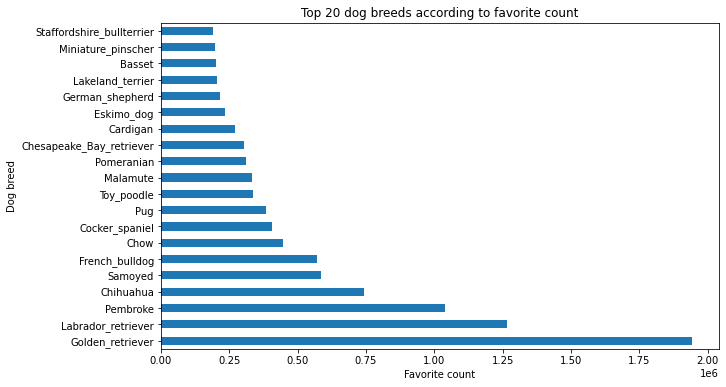

In [92]:
#1. top 20 dog breeds according to favorite count
top_20_db = twitter_data.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize = (10,6))
plt.title("Top 20 dog breeds according to favorite count")
top_20_db.plot(kind = 'barh')
plt.xlabel('Favorite count')
plt.ylabel('Dog breed');

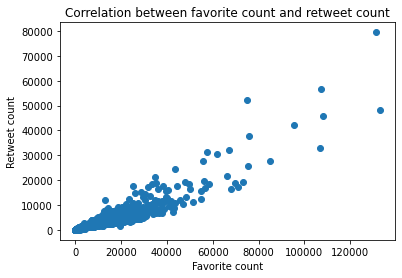

In [93]:
#2. correlation between dog breed and favorite count
plt.scatter(twitter_data.favorite_count, twitter_data.retweet_count)
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')
plt.title("Correlation between favorite count and retweet count")
plt.rcParams['figure.figsize'] = [10,10]
plt.show()


In [94]:
#3. retrieve the image of the dog with the most favorite count
twitter_data.groupby('favorite_count')['tweet_id'].max().sort_values(ascending = False).head(1)

favorite_count
33819    892177421306343426
Name: tweet_id, dtype: int64

In [95]:
top_dog = twitter_data.sort_values(by='favorite_count', ascending = False).head(1)

In [96]:
top_dog

,tweet_id,timestamp,source,text,expanded_urls,names,age,jpg_url,img_num,dog_breed,retweet_count,favorite_count,rating
1653,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,48265,132810,13/10


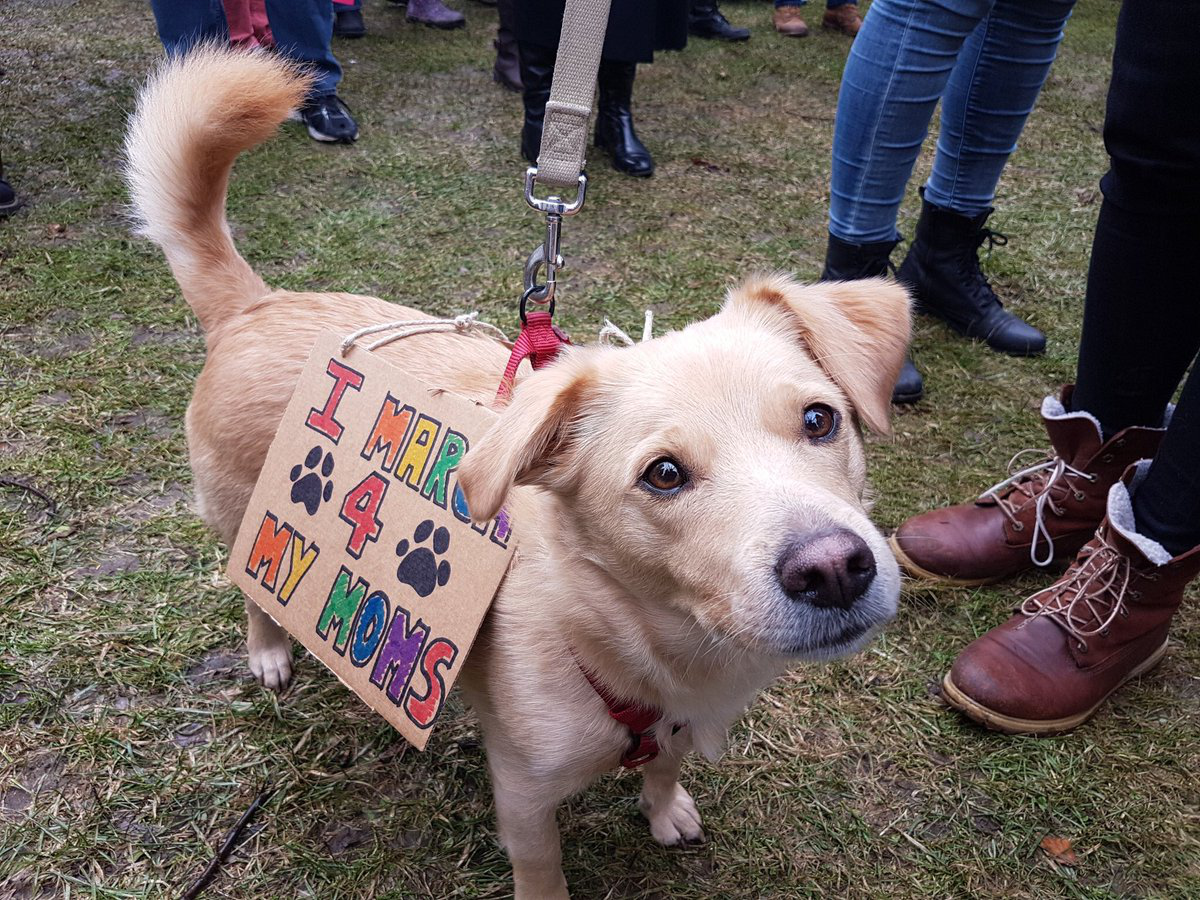

In [97]:
# Using the requests and Pillow library to retrieve the image
url = top_dog.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

> He's beautiful

<a id='Conclusion'></a>
## <u> Conclusion

This project was aimed at creating a detailed example of the data wrangling process. It includes the data gathering process, which involved downloading a csv file, using the requests library to programmatically download a tsv file, and then finally  connecting to the twitter API to scrap the rest of the data, which was then read into a pandas dataframe. This gathered data was then assessed for quality and tidiness issues, with each issue being outlined to be cleaned later. Then the data was cleaned of all issues, and trimmed of all unwanted tables before being analyzed for insights.<br>

The insights derived from the analysis have been documented in a report which will be submitted with this project. 

## Limitations

1. Due to my inability to obtain a twitter developer account which is necessary for accessing the twitter API. I had to download the needed data from the Udacity servers, in order to complete my project.

2. The analyzing and visualizing section is not overly detailed as this was not the focus of this project.

## sources 

1. stackoverflow: For solutions to difficult problems